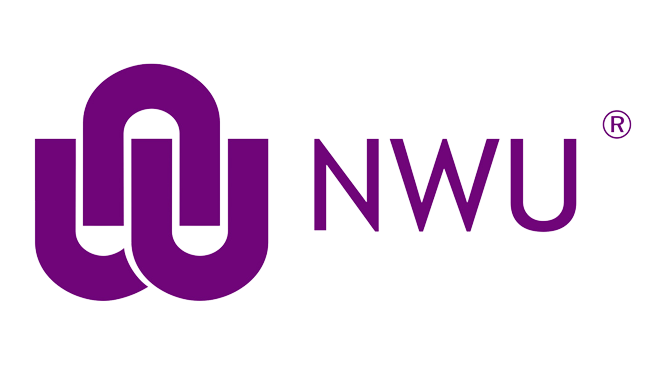

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname: David Mothiba
*   # University Number: 38724839


# Practical Lab 1

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 11/ 08/ 2025 (Monday)

# Instructions: Answer all Questions


# **Problem Statement**
## The world population data spans from 1960 to 2017. We want to develop a prediction model that can provide the most accurate estimation of the current or historical population of a specific nation. Use the two CSV files to answer the questions.

# **Question 1**
## Create a function that accepts a **`country name`** as input and returns a dataframe with the `measured population` and the `year`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("world_population.csv")

In [17]:
world_population.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [3]:
df = pd.read_csv("countries.csv")

In [16]:
countries.head()

,Country Name
0,Aruba
1,Afghanistan
2,Angola
3,Albania
4,Andorra


In [5]:
countries = pd.read_csv("countries.csv")
world_population = pd.read_csv("world_population.csv")
datamerged = pd.concat([countries, world_population], axis = 1 )
datamerged.to_csv('datamerged.csv', index = False)
datamerged.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [6]:
def year_population(name_of_country):

    newdata = datamerged[datamerged['Country Name'] == name_of_country].T.reset_index()[1:]
    newdata['index'] = newdata['index'].apply(int)

    return np.array(newdata)

In [7]:
year_population('Aruba')


array([[1960, 54211.0],
       [1961, 55438.0],
       [1962, 56225.0],
       [1963, 56695.0],
       [1964, 57032.0],
       [1965, 57360.0],
       [1966, 57715.0],
       [1967, 58055.0],
       [1968, 58386.0],
       [1969, 58726.0],
       [1970, 59063.0],
       [1971, 59440.0],
       [1972, 59840.0],
       [1973, 60243.0],
       [1974, 60528.0],
       [1975, 60657.0],
       [1976, 60586.0],
       [1977, 60366.0],
       [1978, 60103.0],
       [1979, 59980.0],
       [1980, 60096.0],
       [1981, 60567.0],
       [1982, 61345.0],
       [1983, 62201.0],
       [1984, 62836.0],
       [1985, 63026.0],
       [1986, 62644.0],
       [1987, 61833.0],
       [1988, 61079.0],
       [1989, 61032.0],
       [1990, 62149.0],
       [1991, 64622.0],
       [1992, 68235.0],
       [1993, 72504.0],
       [1994, 76700.0],
       [1995, 80324.0],
       [1996, 83200.0],
       [1997, 85451.0],
       [1998, 87277.0],
       [1999, 89005.0],
       [2000, 90853.0],
       [2001, 92

# **Question 2**
## We must first divide our data into predictive features (X) and the target (y) before dividing it into training and testing.

## ----------------------------------------------------------------------------------------------------------------------------------------------

## Write a function that will take a dataframe as input `(Question 1)` and return four variables in the form of `(X_train, y_train), (X_test, y_test)` which you will use to train and evaluate your model
## ----------------------------------------------------------------------------------------------------------------------------------------------

## `test_size = 0.2` and `random_state = 42`.

_**Use the results in Question 1 as Inputs:**_
```python
data = get_year_pop('Aruba')
data_split(data)
```
>

In [8]:
def data_split(df):

    X = df[:, 0]
    y = df[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    return (X_train, y_train), (X_test, y_test)



In [10]:
data = year_population('Aruba')
(X_train, y_train), (X_test, y_test) = data_split(data)

In [11]:
data=year_population('Aruba')
data_split(data)

print("x_train : array (",X_train)
print("")
print("y_train : array (",y_train)
print("")
print("X_test : array (",X_test)
print("")
print("y_train : array (",y_test)



x_train : array ( [1996 1991 1968 1977 1966 1964 2001 1979 1990 2009 2010 2014 1975 1969
 1987 1986 1976 1984 1993 2015 2000 1971 1992 2016 2003 1989 2013 1961
 1981 1962 2005 1999 1995 1983 2007 1970 1982 1978 2017 1980 1967 2002
 1974 1988 2011 1998]

y_train : array ( [83200.0 64622.0 58386.0 60366.0 57715.0 57032.0 92898.0 59980.0 62149.0
 101453.0 101669.0 103795.0 60657.0 58726.0 61833.0 62644.0 60586.0
 62836.0 72504.0 104341.0 90853.0 59440.0 68235.0 104822.0 97017.0 61032.0
 103187.0 55438.0 60567.0 56225.0 100031.0 89005.0 80324.0 62201.0
 101220.0 59063.0 61345.0 60103.0 105264.0 60096.0 58055.0 94992.0 60528.0
 61079.0 102053.0 87277.0]

X_test : array ( [1960 1965 1994 1973 2004 2012 1997 1985 2006 1972 2008 1963]

y_train : array ( [54211.0 57360.0 76700.0 60243.0 98737.0 102577.0 85451.0 63026.0 100832.0
 59840.0 101353.0 56695.0]


# **Question 3**
## Use the output from `data_split(df)` to fit a Linear regression model

In [12]:
def train_model(X_train, y_train):

    ridge = Ridge()
    ridge.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

    return ridge


In [13]:
data = year_population('Aruba')
(X_train, y_train), _ = data_split(data)

train_model(X_train, y_train).predict([[1960]])

array([44339.74270252])

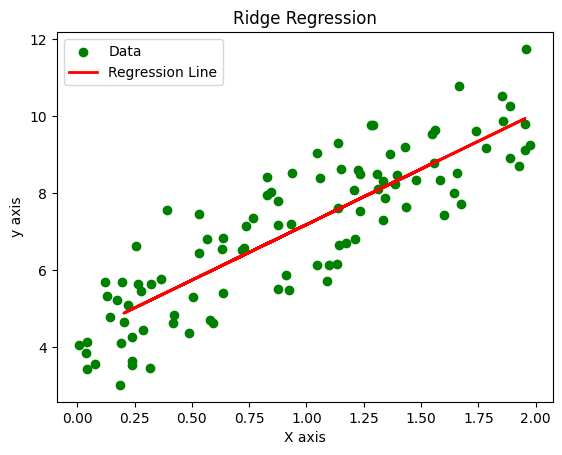

In [ ]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

plt.scatter(X, y, color="green", label="Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("X axis")
plt.ylabel("y axis")
plt.title("Ridge Regression")
plt.legend()
plt.show()

# **Question 4**
Test your model using the testing data that was produced in Question 2. To use the `mean square error` as your performance metric.

Write a function that accepts the `model` in Question 3, and the `test data set` in Question 2

In [14]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test.reshape(-1, 1))
    return round(mean_squared_error(y_test.reshape(-1, 1), y_pred), 2)


In [15]:
data = year_population('Aruba')
(X_train, y_train), (X_test, y_test) = data_split(data)
lm = train_model(X_train, y_train)

test_model(lm, X_test, y_test)

42483684.58